# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Execute BTC url
btc_data = requests.get(btc_url).json()
btc_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19181306,
   'total_supply': 19181306,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 19199.98,
     'volume_24h': 15844547874,
     'market_cap': 368432422353,
     'percentage_change_1h': 0.109304041452173,
     'percentage_change_24h': 0.242838099904871,
     'percentage_change_7d': -1.27607821454704,
     'percent_change_1h': 0.109304041452173,
     'percent_change_24h': 0.242838099904871,
     'percent_change_7d': -1.27607821454704}},
   'last_updated': 1665973166}},
 'metadata': {'timestamp': 1665973166,
  'num_cryptocurrencies': 3116,
  'error': None}}

In [6]:
# Execute BTC url
eth_data = requests.get(eth_url).json()
eth_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120527410,
   'total_supply': 120527410,
   'max_supply': 120527410,
   'quotes': {'USD': {'price': 1300.98,
     'volume_24h': 6463601635,
     'market_cap': 156632268373,
     'percentage_change_1h': -0.0527091003478941,
     'percentage_change_24h': 1.29669703035298,
     'percentage_change_7d': -1.61015516312805,
     'percent_change_1h': -0.0527091003478941,
     'percent_change_24h': 1.29669703035298,
     'percent_change_7d': -1.61015516312805}},
   'last_updated': 1665973129}},
 'metadata': {'timestamp': 1665973129,
  'num_cryptocurrencies': 3116,
  'error': None}}

In [7]:
# Fetch current BTC price
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $23039.98
The current value of your 5.3 ETH is $6895.19


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [10]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [11]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [12]:
# Format current date as ISO format
today = pd.Timestamp("2022-10-13", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-10-13 04:00:00+00:00,94.23,95.44,94.18,95.18,6231878,23778,95.068272,AGG
2022-10-13 04:00:00+00:00,349.43,367.51,348.11,365.97,145171940,1098996,359.798331,SPY


In [13]:
# Reorganize the DataFrame
# Separate ticker data
agg_data = df_portfolio.loc[df_portfolio['symbol'] == 'AGG'].drop(columns=['symbol'])
display(agg_data)

spy_data = df_portfolio.loc[df_portfolio['symbol'] == 'SPY'].drop(columns=['symbol'])
display(spy_data)

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-10-13 04:00:00+00:00,94.23,95.44,94.18,95.18,6231878,23778,95.068272


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-10-13 04:00:00+00:00,349.43,367.51,348.11,365.97,145171940,1098996,359.798331


In [14]:
# Concatenate the ticker DataFrames
joined_data = pd.concat(
    [agg_data, spy_data],
    axis="columns",
    join="inner",
    keys=['AGG', 'SPY']
)

# Preview DataFrame
joined_data

AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2022-10-13 04:00:00+00:00  94.23  95.44  94.18  95.18  6231878       23778   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2022-10-13 04:00:00+00:00  95.068272  349.43  367.51  348.11  365.97   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2022-10-13 04:00:00+00:00  145171940     1098996  359.798331

In [15]:
# Pick AGG and SPY close prices
agg_close_price = float(joined_data['AGG']['close'])
spy_close_price = float(joined_data['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $95.18
Current SPY closing price: $365.97


In [16]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price


# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $19036.00
The current value of your 50 SPY shares is $18298.50


### Savings Health Analysis

In [17]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_amount = my_btc_value + my_eth_value
shares_amount = my_agg_value + my_spy_value
amount = [crypto_amount, shares_amount]

# Create savings DataFrame
df_savings = pd.DataFrame(amount, columns=["Amount"], index = ["Crypto", "Shares"])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,29935.17
Shares,37334.50


<AxesSubplot:ylabel='Amount'>

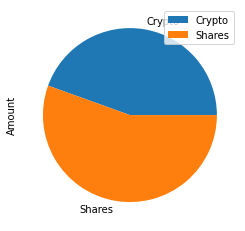

In [18]:
# Plot savings pie chart
df_savings.plot(y = "Amount", kind="pie")

In [19]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_amount + shares_amount
gap = emergency_fund - total_savings

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! Your total savings have reached your goal for the emegency fund.")
elif total_savings < emergency_fund:
    print(f"You are ${gap} away from reaching your goal for the emegency fund.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-10-14', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-10-14', tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_ticker

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-10-16 04:00:00+00:00,109.75,109.8100,109.66,109.75,3788344,11029,109.773173,AGG
2017-10-17 04:00:00+00:00,109.62,109.7400,109.55,109.71,1764880,9926,109.701937,AGG
2017-10-18 04:00:00+00:00,109.51,109.5600,109.46,109.54,1663837,8996,109.521550,AGG
2017-10-19 04:00:00+00:00,109.71,109.7500,109.54,109.62,1876987,9425,109.651062,AGG
2017-10-20 04:00:00+00:00,109.32,109.4050,109.26,109.30,2014321,9709,109.323959,AGG
...,...,...,...,...,...,...,...,...
2022-10-10 04:00:00+00:00,364.00,364.2100,357.67,360.02,75459157,593460,360.745547,SPY
2022-10-11 04:00:00+00:00,358.30,363.0300,355.71,357.74,91448816,688092,358.717517,SPY
2022-10-12 04:00:00+00:00,358.11,359.8179,356.30,356.56,76538522,549606,358.000408,SPY


In [22]:
# Reorganize the DataFrame
# Separate ticker data
agg_data_five_years = df_ticker.loc[df_ticker['symbol'] == 'AGG'].copy().drop(columns = "symbol")
spy_data_five_years = df_ticker.loc[df_ticker['symbol'] == 'SPY'].copy().drop(columns = "symbol")

# Concatenate the ticker DataFrames
df_stock_data = pd.concat(
    [agg_data_five_years, spy_data_five_years],
    axis="columns",
    join="inner",
    keys=['AGG', 'SPY']
)

# Display sample data
df_stock_data.head()

AGG                                    \
                             open     high     low   close   volume   
timestamp                                                             
2017-10-16 04:00:00+00:00  109.75  109.810  109.66  109.75  3788344   
2017-10-17 04:00:00+00:00  109.62  109.740  109.55  109.71  1764880   
2017-10-18 04:00:00+00:00  109.51  109.560  109.46  109.54  1663837   
2017-10-19 04:00:00+00:00  109.71  109.750  109.54  109.62  1876987   
2017-10-20 04:00:00+00:00  109.32  109.405  109.26  109.30  2014321   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2017-10-16 04:00:00+00:00       11029  109.773173  255.20  255.51  254.8200   
2017-10-17 04:00:00+00:00        9926  109.701937  255.24  255.52  254.9800   
2017-10-18 04:00:00+00:00        8996  109.521550  255.92  255.95  255.5000   
2017-10-19 04:00:00+00:00        9425  109.651062  254.83  255.83  254.3500   
2017-10-20 04:00:00+00:00        9709  109.323959  256.73  257.14  255.7744   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-10-16 04:00:00+00:00  255.29  38608777      128094  255.168262  
2017-10-17 04:00:00+00:00  255.47  32507646      120555  254.627844  
2017-10-18 04:00:00+00:00  255.72  40936574      121862  255.720138  
2017-10-19 04:00:00+00:00  255.79  61948288      190692  255.297268  
2017-10-20 04:00:00+00:00  257.11  89178367      196614  256.766187

In [23]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [24]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                    \
                             open     high     low   close   volume   
timestamp                                                             
2017-10-16 04:00:00+00:00  109.75  109.810  109.66  109.75  3788344   
2017-10-17 04:00:00+00:00  109.62  109.740  109.55  109.71  1764880   
2017-10-18 04:00:00+00:00  109.51  109.560  109.46  109.54  1663837   
2017-10-19 04:00:00+00:00  109.71  109.750  109.54  109.62  1876987   
2017-10-20 04:00:00+00:00  109.32  109.405  109.26  109.30  2014321   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-10-16 04:00:00+00:00       11029  109.773173          NaN  255.20   
2017-10-17 04:00:00+00:00        9926  109.701937    -0.000364  255.24   
2017-10-18 04:00:00+00:00        8996  109.521550    -0.001550  255.92   
2017-10-19 04:00:00+00:00        9425  109.651062     0.000730  254.83   
2017-10-20 04:00:00+00:00        9709  109.323959    -0.002919  256.73   

                                                                           \
                             high       low   close    volume trade_count   
timestamp                                                                   
2017-10-16 04:00:00+00:00  255.51  254.8200  255.29  38608777      128094   
2017-10-17 04:00:00+00:00  255.52  254.9800  255.47  32507646      120555   
2017-10-18 04:00:00+00:00  255.95  255.5000  255.72  40936574      121862   
2017-10-19 04:00:00+00:00  255.83  254.3500  255.79  61948288      190692   
2017-10-20 04:00:00+00:00  257.14  255.7744  257.11  89178367      196614   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-10-16 04:00:00+00:00  255.168262          NaN  
2017-10-17 04:00:00+00:00  254.627844     0.000705  
2017-10-18 04:00:00+00:00  255.720138     0.000979  
2017-10-19 04:00:00+00:00  255.297268     0.000274  
2017-10-20 04:00:00+00:00  256.766187     0.005160

In [25]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003065,0.998647,1.003318,0.989438,0.991503,0.979262,1.003372,0.999392,1.001789,0.997039,...,1.002855,1.004002,1.008831,0.998579,0.986381,0.994536,1.001351,0.993764,0.997413,0.997852
2,1.019978,1.008182,1.014760,0.999675,0.994647,0.959377,1.002147,1.005395,0.994314,0.999664,...,0.997040,1.002755,1.022240,0.995899,0.983050,0.995196,1.011427,1.009030,0.993074,0.974351
3,1.010634,0.995516,1.011975,1.003835,0.995892,0.947237,1.002631,1.015019,0.995991,0.997282,...,1.004844,1.006512,1.010673,0.998400,0.993364,1.009025,1.030195,1.005851,0.998011,0.977787
4,1.018416,0.993838,1.015641,1.004640,0.978504,0.946074,1.001846,1.005565,1.003016,1.009035,...,0.994278,1.008072,1.010729,1.002537,0.999864,1.001690,1.038043,1.017311,1.006021,0.976330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.699404,1.358395,0.638648,2.307021,4.114070,1.837470,1.968130,1.460512,5.832970,3.421830,...,5.280111,4.857797,0.555918,1.982351,3.246151,7.979338,3.140714,9.979295,1.477714,1.546580
7557,3.731672,1.357889,0.635169,2.301385,4.099215,1.829153,1.970672,1.465222,5.743745,3.444815,...,5.282254,4.841456,0.552414,1.987550,3.231935,7.871887,3.131949,9.985597,1.471028,1.560782
7558,3.747787,1.365390,0.633943,2.314730,4.091476,1.828136,1.943745,1.446602,5.740044,3.451286,...,5.216990,4.872303,0.545778,2.008148,3.230732,7.863051,3.147532,9.996672,1.473217,1.562131
7559,3.733650,1.384443,0.632255,2.328443,4.098691,1.807906,1.946162,1.451169,5.724884,3.457785,...,5.226743,4.922982,0.549797,2.017283,3.125358,7.784200,3.103059,9.823663,1.471754,1.571488


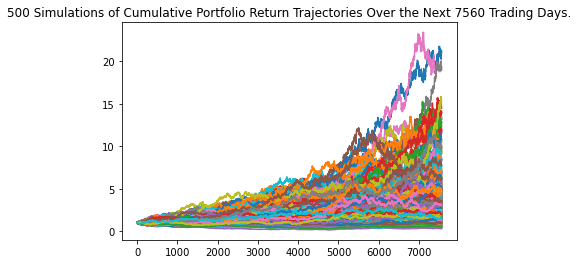

In [26]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

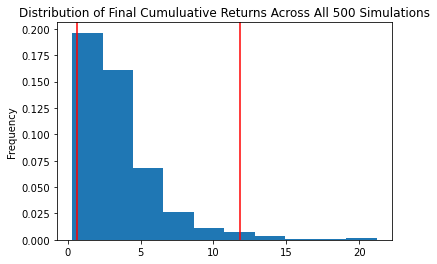

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              3.576260
std               2.843410
min               0.305406
25%               1.727093
50%               2.826506
75%               4.565363
max              21.190335
95% CI Lower      0.618940
95% CI Upper     11.787891
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [33]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $12378.79 and $235757.82


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [34]:
# Set initial investment
increased_initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
increased_ci_lower = round(even_tbl[8]*increased_initial_investment,2)
increased_ci_upper = round(even_tbl[9]*increased_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${increased_initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${increased_ci_lower} and ${increased_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $18568.19 and $353636.73


## Optional Challenge - Early Retirement


### Five Years Retirement Option: Riskier Portfolio (`80%` stocks (`SPY`) and `20%` bonds (`AGG`))

In [42]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.2, 0.8],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [43]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010356,0.991713,1.015575,0.982054,0.997811,1.000454,0.983601,0.980244,0.993605,0.985749,...,1.008694,1.009973,1.018002,0.996825,1.006809,0.987691,1.005967,0.990014,1.007357,0.996395
2,0.994025,1.005616,1.019495,0.991014,1.004126,1.000188,0.998608,0.976588,0.985096,0.986771,...,1.009359,1.009208,1.017024,0.989839,0.978164,0.986935,1.001604,0.980565,1.001235,0.991261
3,1.009068,1.007128,1.009923,1.004569,1.018384,1.013280,0.979201,0.967639,0.980058,0.991690,...,0.994546,0.986367,1.022807,0.976837,0.973110,0.988126,0.986833,0.966395,1.012828,0.991757
4,1.000906,1.004501,0.996874,1.020336,0.993348,1.001378,0.966849,0.988236,0.973106,0.968896,...,0.985455,0.979445,1.041251,0.973787,0.975872,0.960309,0.983857,0.976239,1.013473,0.996855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.188389,0.706601,0.777938,2.428617,0.709460,1.480727,1.429275,0.819200,1.708478,0.456397,...,1.099403,0.914494,1.917962,1.354807,0.850988,1.293611,0.910284,1.519043,1.256193,1.561879
1257,1.206472,0.691846,0.771785,2.442719,0.704847,1.479687,1.446841,0.817194,1.708806,0.457475,...,1.086639,0.902228,1.929364,1.326151,0.870272,1.306593,0.898927,1.527809,1.236171,1.549486
1258,1.204574,0.698601,0.791536,2.441121,0.708337,1.469524,1.454681,0.822528,1.714858,0.455431,...,1.097201,0.887801,1.928114,1.328678,0.886849,1.295187,0.895311,1.543076,1.249104,1.544097
1259,1.227507,0.705789,0.797435,2.449261,0.708839,1.494658,1.443543,0.818509,1.730345,0.453131,...,1.093459,0.891672,1.933363,1.329226,0.893569,1.291444,0.884808,1.547336,1.248054,1.527728


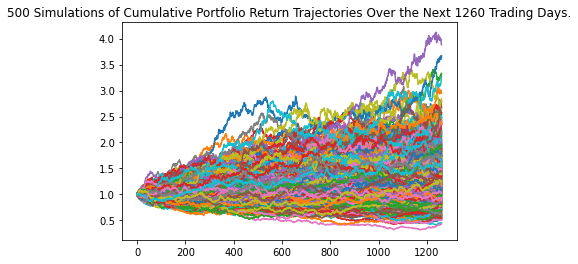

In [45]:
# Plot simulation outcomes
line_plot_five = MC_even_dist_five.plot_simulation()

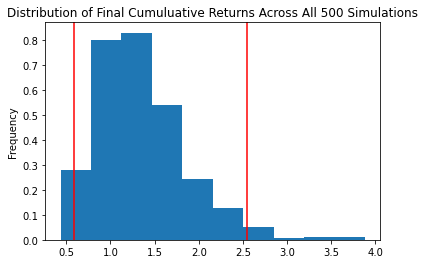

In [46]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_even_dist_five.plot_distribution()

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_five)

count           500.000000
mean              1.349383
std               0.512083
min               0.434234
25%               1.002372
50%               1.273310
75%               1.616677
max               3.880835
95% CI Lower      0.588168
95% CI Upper      2.550807
Name: 1260, dtype: float64


In [48]:
# Set initial investment
initial_investment_five = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_five[8]*initial_investment_five,2)
ci_upper_five = round(even_tbl_five[9]*initial_investment_five,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $11763.35 and $51016.14


### Ten Years Retirement Option: Higher Initial Investment (a `80%` increase in the initial investment)

In [49]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [50]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993823,1.011073,0.985122,0.995065,0.991978,0.988710,1.002240,1.003237,1.004001,0.998142,...,0.995024,0.993826,0.993262,0.993269,1.003755,1.011657,0.982373,0.989717,0.999485,0.996095
2,0.990411,1.007270,0.974532,0.990890,0.982652,0.983881,1.003134,0.999784,1.026293,0.998012,...,0.989521,0.990594,0.987303,0.986572,1.008837,1.010906,0.987998,0.986094,1.004527,0.986746
3,0.991485,1.009439,0.977686,0.980506,0.992277,0.986214,1.019997,0.988081,1.035791,0.994375,...,0.997537,1.001571,0.986441,0.982306,1.006214,0.996141,0.995745,0.986615,1.001408,0.990638
4,1.004786,0.998908,0.977289,0.985698,0.990299,0.977185,1.008320,0.986962,1.033506,0.989336,...,1.006156,0.985255,0.996709,0.972394,1.003608,1.003419,0.995230,0.987244,0.995278,1.001166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.014904,0.953190,1.730776,1.983024,0.801815,2.120479,1.628349,1.772263,1.735342,1.805806,...,1.774863,0.945608,0.366961,1.411313,1.722824,2.209867,0.811011,3.336657,1.500926,1.703653
2517,1.007862,0.947002,1.713924,2.004500,0.797197,2.140882,1.622675,1.780530,1.713059,1.810333,...,1.779042,0.946744,0.367972,1.414580,1.707214,2.226751,0.798014,3.368437,1.492111,1.714648
2518,1.006428,0.952887,1.741405,2.024408,0.786691,2.129819,1.591810,1.774327,1.731511,1.799649,...,1.751887,0.942737,0.358496,1.399654,1.694793,2.207795,0.797915,3.410147,1.465674,1.707636
2519,1.005441,0.951164,1.714205,2.035385,0.789160,2.101695,1.589035,1.768012,1.735833,1.802433,...,1.722768,0.944777,0.359348,1.411222,1.680275,2.216232,0.789073,3.384908,1.456498,1.714095


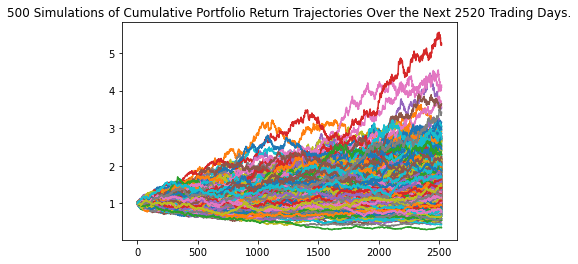

In [51]:
# Plot simulation outcomes
line_plot_ten = MC_even_dist_ten.plot_simulation()

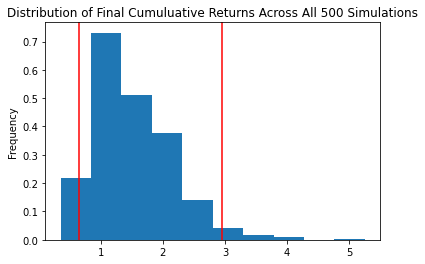

In [52]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [53]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_ten)

count           500.000000
mean              1.523351
std               0.635740
min               0.353407
25%               1.084306
50%               1.378907
75%               1.882791
max               5.250431
95% CI Lower      0.651038
95% CI Upper      2.958993
Name: 2520, dtype: float64


In [54]:
# Set initial investment
initial_investment_ten = 20000 * 1.8

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_ten[8]*initial_investment_ten,2)
ci_upper_ten = round(even_tbl_ten[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $36000.0 in the portfolio over the next 10 years will end within in the range of $23437.38 and $106523.73
